## Importar Librerías

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Cargar Datos

In [4]:
# Cargamos el archivo CSV
df = pd.read_csv('Dry_Bean.csv')

In [5]:
# Vemos las 5 primeras filas de CSV
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# "unique" retorna los valores únicos de la columna 'Class'
# ejm: [A,B,B,C,A] -> unique = [A,B,C]
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [98]:
# resumen estadístico con metricas como:
# conteo, media, desviación estandar, valor minimo, cuartiles, valor máximo
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Limpieza de Datos

### Eliminar Datos Duplicados

In [7]:
df.drop_duplicates(inplace=True)

### Manejo de Datos Nulos

In [100]:
# Comprobamos si existen datos nulos
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Under Sampling

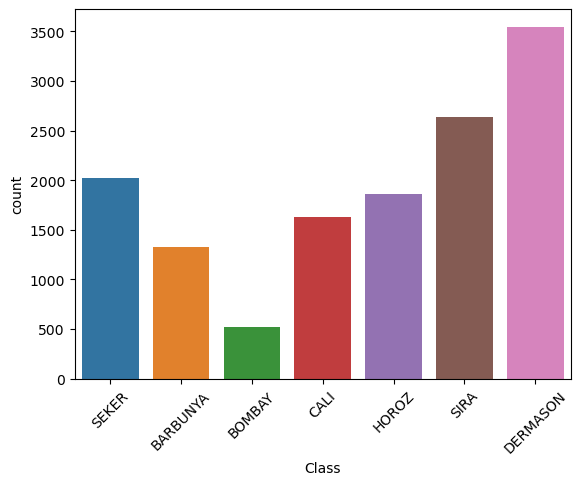

In [8]:
# countplot grafica un conteo de datos
sns.countplot(x='Class', data=df)
# Rota en 45 grados las etiquetas de Class
plt.xticks(rotation=45)
plt.show()

En el grafico anterior observamos que hay una gran cantidad de datos para "DERMASON" y muy pocos para "BOMBAY" lo que se considera como un dataset no balanceado que podría afectar el desempreño de la regresión logística, por que aprenderá a predicir de mejor forma datos con mayor catidad de información al contrario de las que tienen poca información como la "BOMBAY"

Solución
En este caso como tenemos 500 datos para "BOMBAY" consideramos que son datos suficientes para nuestra regresión logística, por lo que haremos "under_sampling" reduciendo los datos de las clases de frijoles al mínimo que son 500 datos

In [9]:
# RandomUnderSampler toma datos aleatoriamente para reducirlos al mínimo
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [10]:
# Separando las variables independiente de la variable Objetivo
x = df.drop('Class', axis=1)
y = df.Class

In [11]:
# implementamos el under_sampling en las variables (x,y) y
# asignamos el resultado a las variables: x_over, y_over
x_over, y_over = undersample.fit_resample(x, y)

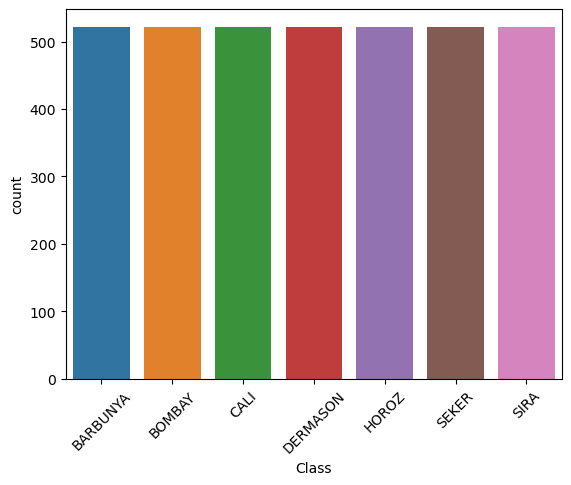

In [12]:
# Comprobamos que los datos se nivelaron
sns.countplot(x=y_over, data=x_over)
plt.xticks(rotation=45)
plt.show()

### Conversión a Numéricos

In [13]:
# Listamos los campos únicos de la columna "Class" (y_over)
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [14]:
# Con "replace" asignamos un valor numérico a cada campo
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [15]:
# Comprobamos los cambios
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

### Realizar Analisis de Correlación

In [93]:
x_over.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2754,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658,1
2506,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731,1
2267,60736,985.501,342.445302,226.741775,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941,1
2449,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165594,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864,1
2076,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678,1


In [16]:
# Juntamos las variables independientes y dependiente en la df_dea
df_dea = x_over.copy()
df_dea['Class'] = y_over

# NOTA: Al querer asignar los datos de y_over a df_dea tambien se lo asignamos a x_over
# esto es debido a que df_dea = x_over estarán ocupando la misma ubicación en memoria
# y por eso le añadimos copy() a x_over para evitar ese problema

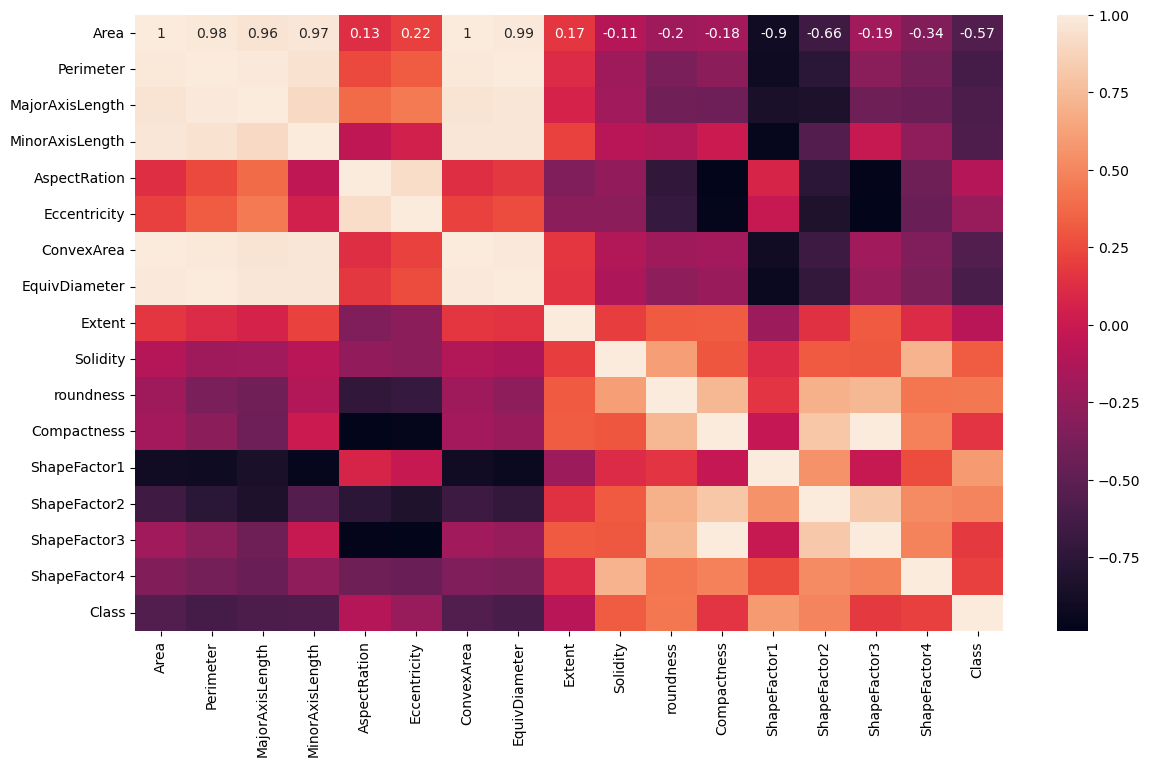

In [112]:
plt.figure(figsize=(14,8))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

**Gráfico:**
- Los datos cercanos al 1 indican que están altamente correlacionada
- Los datos cercanos al -1 indican que están inversamente correlacionada
- Los datos cercanos al 0 indican que no tienen correlación

**Ejemplo de Alto Nivel de Correlación**
- En el eje Y la variable 'ConvexArea' tiene un alto nivel de correlación en el eje X con 'Area, perimeter, MajorAxis...'
- En el eje Y la variable 'EquivDiameter' tiene un alto nivel de correlación en el eje X con 'Area, perimeter, MajorAxis...'

### Eliminar datos altamente Correlacionados

La eliminicación de datos correlacionados dependerá su irrelevancia para el análisis, En algunos casos, las variables altamente correlacionadas pueden ser críticas para el problema en cuestión, y eliminarlas podría no ser deseable por lo que es importante tener un alto conocimiento de los datos que manejas y el negocio

In [17]:
# Procedemos a eliminar  'ConvexArea' y  'EquivDiameter'
x_over.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

In [18]:
x_over.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2754,70776,1060.894,386.619944,234.100208,1.651515,0.795842,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658
2506,66370,1004.139,339.287072,249.883085,1.357783,0.676443,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731
2267,60736,985.501,342.445302,226.741775,1.510288,0.749393,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941
2449,65219,1011.110,353.650546,235.308999,1.502920,0.746512,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864
2076,51332,889.637,330.822804,198.618899,1.665616,0.799716,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678


## Visualización de Datos

In [ ]:
# NOTA: ESTO DEMORA DEMASIADO
# Muestra graficas de dispersión de puntos entre todas la variables segmentadas por 'Class'
sns.pairplot(df_dea, hue='Class')

El objetivo de la grafica de dispersión es notar como cada segmento se distribuyen sobre ciertas areas indicando que son altamente clasificables

## Split y escalamiento de Datos

In [19]:
# Separando en datos de entrenamiento y test
# shuffle=True para garantizar una división aleatoria y representativa de los datos en los conjuntos de entrenamiento y prueba
# shuffle=False, los datos se dividirán en el orden en que aparecen en el conjunto de datos.
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.2, random_state=42, shuffle=True)

In [20]:
# Asignamos metodo de estandarización a una variable
st_x = StandardScaler()
# Escalamos o Normalizando datos con fit_transform
# fit_transform calcula la media y distribución estandar, luego aplica la tranformación
x_train = st_x.fit_transform(x_train)
# Escalamos datos solo con transform
# Como ya calculamos anteriormente la media y su distribución estandar solo necesitamos aplicar la transformación
x_test = st_x.transform(x_test)

## Entrenamiento del modelo

#### Explicación de los argumentos de LogisticRegression.. net.

1. **solver** especifica el algoritmo que se utilizará para la optimización

    - 'lbfgs': Algoritmo de optimización quasi-Newton.
    - 'liblinear': Algoritmo de descenso de gradiente estocástico.
    - 'newton-cg': Método de Newton conjugado.
    - 'sag': Gradiente estocástico promedio.
    - 'saga': Versión mejorada de 'sag' que también admite penalizaciones de elastic net.

2. **multi_class** especifica cómo se manejan las clasificaciones multiclase.
    - 'ovr' (uno contra el resto): Crea un clasificador por cada clase y clasifica en función de la clase que tenga la probabilidad más alta.
    - 'multinomial': Utiliza una pérdida multinomial y un optimizador que soporta directamente la clasificación multiclase. No es compatible con 'liblinear' solver.
    - 'auto': Delega la elección entre 'ovr' y 'multinomial' al solver.
    - Nota: 'ovr' se elige para los solucionadores 'liblinear', 'sag' y 'saga', y 'multinomial' para 'newton-cg', 'lbfgs' y 'sag'.

4. **n_jobs** especifica el número de núcleos de CPU que se utilizarán para realizar el ajuste
    - None (predeterminado): Utiliza un solo núcleo.
    - -1: Utiliza todos los núcleos disponibles.

5. **C** ayuda a prevenir el sobreajuste (overfitting), recive valores positivos y no hay un límite
    - Un valor alto de C indica una menor regularización
    - Un valor bajo de C indica una mayor regularización

### Configuración del Modelo

In [21]:
# Creamos un función que retorna un modelo de regresión logistica con las configuraciones dadas por parámetro
def logistic_model(solver_, multiclass_, C_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_)
    return logistic_regression_model

In [22]:
# Usando la función anterior llamamos a un modelo de regresión lineal
model = logistic_model('saga', 'multinomial', 1)
# Entrenamos al modelo
model.fit(x_train, y_train)
# Realizamos una predicción
predictions = model.predict(x_test)
# Comparamos aciertos en una matriz de confusión
print(confusion_matrix(y_test, predictions))
# imprimimos el porcentaje de precisión
print(accuracy_score(y_test, predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


In [25]:
# Listamos las opciones de clasificación
multiclass = ['ovr', 'multinomial']
# Listamos las opciones de algoritmos
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
# array donde se guardarán los porcentajes de precición
scores=[]
# array donde se guardarán los nombres de la combinaciones de parametros realizadas
params=[]
# Realizamos una iteración sobre cada una de la opciones de multiclass
for i in multiclass:
    # Por cada opción de multiclass iteramos cada unos de las opciones de algoritmos
    for j in solver_list:
        # como las clasificaciones no funcionan con todos los algoritmos realizamos un try except
        # try recibe las combinaciones permitidas y except la no permitidas
        try:
            model = logistic_model(j, i, 1)
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            params.append(i + '-' + j)
            accuraccy = accuracy_score(y_test, predictions)
            scores.append(accuraccy)
        except:
            # las combinaciones no permitidas solo se ignoran
            None

/home/johnny/anaconda3/envs/regresionLogistica/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.93)

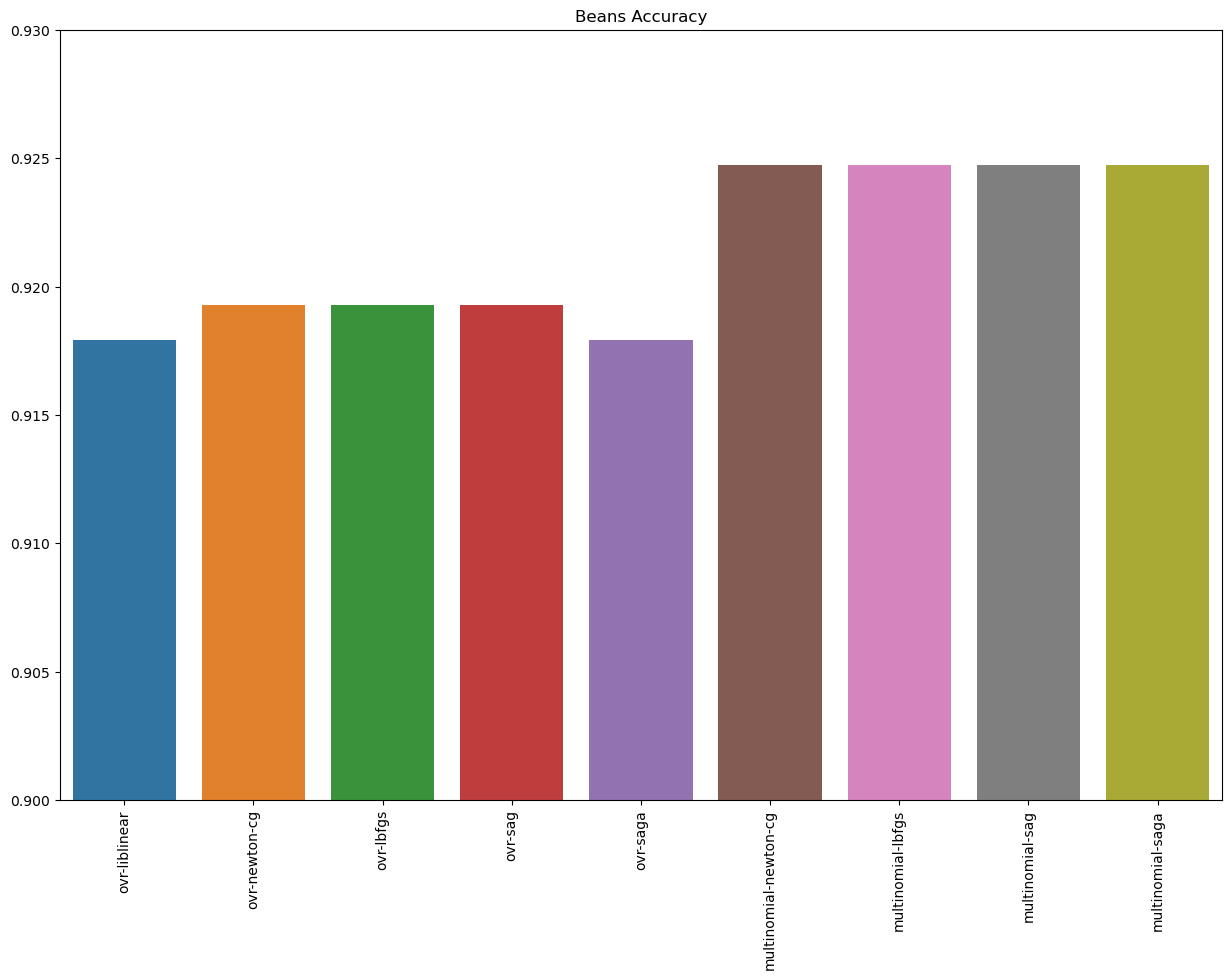

In [26]:
fig = plt.figure(figsize=(15,10))
# En una grafica de barras mostramos todas las configuraciones realizadas y sus porcentajes de precisión
sns.barplot(x=params, y=scores).set_title('Beans Accuracy')
# Rotamos las etiquetas de x 90 grados
plt.xticks(rotation=90)
# indicamos una proporción del eje y a observar, es como hacer un zoom a una sección
plt.ylim([ 0.9, 0.93 ])

En la gráfica comprobamos que la configuración con mayor precisión es: multi_calss='multinomial', solver='newton-cg'

In [30]:
# implementamos el modelo con la mejor configuración que indica la gráfica
model = logistic_model('newton-cg', 'multinomial', 1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


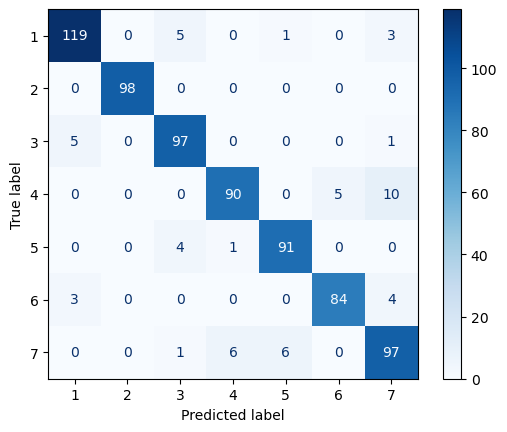

In [31]:
# Configuramos una matriz de confusion con los datos de test, predicción y le indicamos los nombres de los labels
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
# Mejoramos la visualización o estilo de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# Indicamos un mapa de color para pintar la matriz
disp.plot(cmap='Blues')
# Visualizamos
plt.show()

### Otra forma de encontrar la mejor configuración para nuestro Modelo

In [33]:
from sklearn.model_selection import GridSearchCV
import warnings
# Ignoramos los warnings
warnings.filterwarnings('ignore')
# llamamos al modelo
logreg = LogisticRegression()
# Listamos todos las opciones para los parámetros solver y multi_class
parameters = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class':['ovr', 'multinomial']}
# Usamos GridSearchCV para encontrar e implementar la mejor combinación de hiperparámetros (solver y multi_class)
clf = GridSearchCV(logreg, param_grid=parameters, scoring='accuracy', cv=10)
# Realizamos el entrenamiento
clf.fit(x_train, y_train)
# Imprimir la mejor configuración de hiperparámetros encontrada
print("Mejores hiperparámetros:", clf.best_params_)
# Predecir con el modelo ajustado
pred = clf.predict(x_test)
# Imprimir la matriz de confusión y la precisión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, pred))
print("Precisión:", accuracy_score(y_test, pred))

Mejores hiperparámetros: {'multi_class': 'multinomial', 'solver': 'newton-cg'}
Matriz de Confusión:
[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
Precisión: 0.9247606019151847


### Buscando Overfitting con Validación Cruzada

In [32]:
# Usando Validación cruzada para evaluar si existe overfitting
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Llamamos al modelos con la mejor configuración encontrada
model_2 = logistic_model('newton-cg', 'multinomial', 1)
kfold = KFold(n_splits=5)
# cross_val_score se utiliza para realizar validación cruzada y obtener las puntuaciones (scores)
# para diferentes pliegues del conjunto de datos.
scores = cross_val_score(model_2, x_test, y_test, cv=kfold)
# Imprimir las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada:", scores)
# Imprimir la puntuación media y la desviación estándar de las puntuaciones
print("Puntuación media:", scores.mean())
print("Desviación estándar de las puntuaciones:", scores.std())

Puntuaciones de validación cruzada: [0.91156463 0.97260274 0.87671233 0.93150685 0.93150685]
Puntuación media: 0.9247786785947255
Desviación estándar de las puntuaciones: 0.031185453536081525


**OBSERVACIÓN DE DATOS DE VALIDACIÓN CRUZADA**
1. Puntuaciones de Validación Cruzada:    - 
Las puntuaciones individuales para cada pliegue están bastante cerca entre sí, lo cual es una buena señal de consistenc 
2. Puntuación Media:    - 
La puntuación media es alta (0.92), lo cual es positivo. Indica que, en promedio, el modelo tiene un buen rendimiento en los pliegues de validaci
3. Desviación Estándar:
    - 
La desviación estándar es relativamente baja (0.03), lo cual sugiere que las puntuaciones son consistentes entre los pliegu
s.n.a.